# Portfolio "Electric Vehicle Charging in Germany"

# Import Libraries

Installieren und importieren Sie bitte folgende Bibliotheken für dieses Jupyter Notebook

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
from shapely.geometry import Point, Polygon
from IPython.display import display, HTML
import os
from datetime import datetime as dt
import matplotlib.dates as mdates
import ipywidgets as widgets
from IPython.display import display, HTML
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# CSV-Datei 

1. Den Datensatz 'Electric Vehicle Charging in Germany' findet man als CSV-Datei 'charging_data.csv' unter folgenden Link auf Kaggle.
https://www.kaggle.com/datasets/mexwell/electric-vehicle-charging-in-germany

2. Die CSV-Datei herunterladen und an einem beliebigen Speicherort speichern.

3. Mit folgender Funktion in das Jupyter Notebook einlesen.

In [4]:
ds = pd.read_csv("C:\\Users\\Administrator\\OneDrive\\Dokumente\\Data Science Portfolio\\Data Science\\Analytics-Avengers\\charging_data.csv")

# Data Understanding

Zeigt die ersten 5 Zeilen des Datensatzes

In [20]:
ds.head()

Unnamed: 0            betreiber  art_der_ladeeinrichung  anzahl_ladepunkte  \
0           0              GGEW AG   Normalladeeinrichtung                  1   
1           1        Pfalzwerke AG  Schnellladeeinrichtung                  2   
2           2  ENTEGA Energie GmbH   Normalladeeinrichtung                  2   
3           3     Entega Plus GmbH   Normalladeeinrichtung                  2   
4           4     Entega Plus GmbH   Normalladeeinrichtung                  2   

   anschlussleistung       steckertypen1       steckertypen2 steckertypen3  \
0                4.6  AC Steckdose Typ 2                 NaN           NaN   
1               75.0  AC Steckdose Typ 2   DC Kupplung Combo           NaN   
2               44.0  AC Steckdose Typ 2  AC Steckdose Typ 2           NaN   
3               22.0  AC Steckdose Typ 2  AC Steckdose Typ 2           NaN   
4               22.0  AC Steckdose Typ 2  AC Steckdose Typ 2           NaN   

  steckertypen4  p1_kw  ...  p4_kw  kreis_kreisfreie_stadt     ort  \
0           NaN    4.6  ...    NaN    Landkreis Bergstraße  Lorsch   
1           NaN   22.0  ...    NaN    Landkreis Bergstraße  Lorsch   
2           NaN   22.0  ...    NaN    Landkreis Bergstraße   Fürth   
3           NaN   22.0  ...    NaN    Landkreis Bergstraße   Fürth   
4           NaN   22.0  ...    NaN    Landkreis Bergstraße   Fürth   

  postleitzahl           strasse  hausnummer adresszusatz inbetriebnahmedatum  \
0        64653       Klosterstr.          23          NaN          2017-01-02   
1        64653  Nibelungenstraße     135-137          NaN          2021-04-27   
2        64658   Krumbacher Str.          39          NaN          2017-11-21   
3        64658     Erbacher Str.         102            a          2022-04-08   
4        64658         Schulstr.          12          NaN          2022-04-08   

  breitengrad laengengrad  
0   49.653064    8.572109  
1   49.652969    8.554764  
2   49.658037    8.787881  
3   49.663670    8.796830  
4   49.646360    8.781410  

[5 rows x 22 columns]

Zeigt die letzten 5 Zeilen des Datensatzes

In [21]:
ds.tail()

Unnamed: 0                betreiber art_der_ladeeinrichung  \
36765       36765  Stadtwerke Leipzig GmbH  Normalladeeinrichtung   
36766       36766  Stadtwerke Leipzig GmbH  Normalladeeinrichtung   
36767       36767  Stadtwerke Leipzig GmbH  Normalladeeinrichtung   
36768       36768  Stadtwerke Leipzig GmbH  Normalladeeinrichtung   
36769       36769  Stadtwerke Leipzig GmbH  Normalladeeinrichtung   

       anzahl_ladepunkte  anschlussleistung       steckertypen1  \
36765                  2               30.0  AC Steckdose Typ 2   
36766                  2               30.0  AC Steckdose Typ 2   
36767                  2               30.0  AC Steckdose Typ 2   
36768                  2               30.0  AC Steckdose Typ 2   
36769                  2               22.0   AC Kupplung Typ 2   

            steckertypen2 steckertypen3 steckertypen4  p1_kw  ...  p4_kw  \
36765  AC Steckdose Typ 2           NaN           NaN   22.0  ...    NaN   
36766  AC Steckdose Typ 2           NaN           NaN   22.0  ...    NaN   
36767  AC Steckdose Typ 2           NaN           NaN   22.0  ...    NaN   
36768  AC Steckdose Typ 2           NaN           NaN   22.0  ...    NaN   
36769   AC Kupplung Typ 2           NaN           NaN   11.0  ...    NaN   

         kreis_kreisfreie_stadt      ort postleitzahl                 strasse  \
36765  Kreisfreie Stadt Leipzig  Leipzig         4277       Bornaische Straße   
36766  Kreisfreie Stadt Leipzig  Leipzig         4277          Scheffelstraße   
36767  Kreisfreie Stadt Leipzig  Leipzig         4277       Bornaische Straße   
36768  Kreisfreie Stadt Leipzig  Leipzig         4277  Richard Lehmann Straße   
36769  Kreisfreie Stadt Leipzig  Leipzig         4277       Eichendorffstraße   

       hausnummer                                    adresszusatz  \
36765         108                                             NaN   
36766          35                                             NaN   
36767          55                                             NaN   
36768         120                                             NaN   
36769          11  Parkplatz Fitnessstudio, Zuganskarte notwendig   

      inbetriebnahmedatum breitengrad laengengrad  
36765          2016-06-01   51.301227   12.384566  
36766          2016-06-01   51.311695   12.372912  
36767          2018-07-05   51.305046   12.382487  
36768          2019-08-12   51.314325   12.397213  
36769          2022-04-13   51.314364   12.374747  

[5 rows x 22 columns]

Der Datensatz hat 22 Spalten und 36770 Zeilen.

In [22]:
ds.shape

(36770, 22)

Zeigt den Datentyp und wie veile Werte nicht 0 sind jeder Spalte an.

In [23]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36770 entries, 0 to 36769
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              36770 non-null  int64  
 1   betreiber               36770 non-null  object 
 2   art_der_ladeeinrichung  36770 non-null  object 
 3   anzahl_ladepunkte       36770 non-null  int64  
 4   anschlussleistung       36770 non-null  float64
 5   steckertypen1           36770 non-null  object 
 6   steckertypen2           31111 non-null  object 
 7   steckertypen3           2233 non-null   object 
 8   steckertypen4           1132 non-null   object 
 9   p1_kw                   36770 non-null  float64
 10  p2_kw                   31129 non-null  float64
 11  p3_kw                   2233 non-null   float64
 12  p4_kw                   1131 non-null   float64
 13  kreis_kreisfreie_stadt  36770 non-null  object 
 14  ort                     36770 non-null

In [24]:
ds.describe()

Unnamed: 0  anzahl_ladepunkte  anschlussleistung         p1_kw  \
count  36770.000000       36770.000000       36770.000000  36770.000000   
mean   18384.500000           1.938075          53.879393     37.648928   
std    10614.729036           0.550034          64.178987     58.958237   
min        0.000000           1.000000           2.000000      1.000000   
25%     9192.250000           2.000000          22.000000     22.000000   
50%    18384.500000           2.000000          44.000000     22.000000   
75%    27576.750000           2.000000          44.000000     22.000000   
max    36769.000000           4.000000        1200.000000    360.000000   

              p2_kw        p3_kw        p4_kw  postleitzahl   breitengrad  \
count  31129.000000  2233.000000  1131.000000  36770.000000  36770.000000   
mean      38.365378    32.406879    26.196729  54564.223117     50.562816   
std       58.080733    40.314259    39.295098  27390.091752      1.828351   
min        2.000000     2.000000     2.300000   1062.000000     47.284400   
25%       22.000000    22.000000    22.000000  31137.000000     48.833821   
50%       22.000000    22.000000    22.000000  56357.000000     50.661428   
75%       22.000000    22.000000    22.000000  79117.000000     51.992060   
max      360.000000   360.000000   360.000000  99991.000000     55.019600   

        laengengrad  
count  36770.000000  
mean       9.751840  
std        2.026769  
min        5.243745  
25%        8.249386  
50%        9.470774  
75%       11.462498  
max       15.543810

# Data Cleaning

Zeigt die Nullwerte für jede Spalte, anhand einer Heatmap, an.

<Axes: >

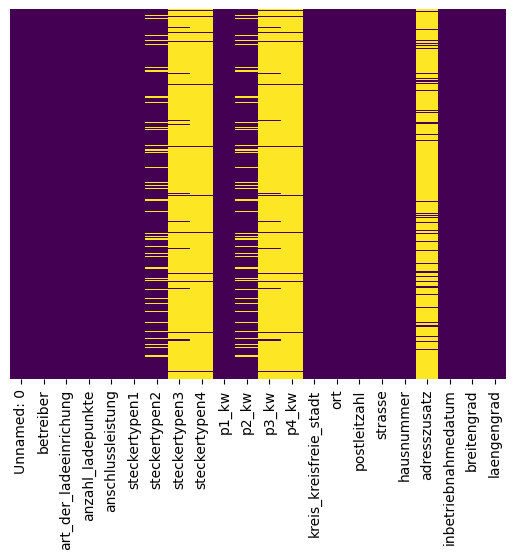

In [25]:
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Entfernen der unnötigen Spalten.

In [26]:
#Drop Columns/Entfernen der unnötigen Spalten
ds = ds.drop(columns=['Unnamed: 0', 'steckertypen1', 'steckertypen2', 'steckertypen3', 'steckertypen4', 'p1_kw', 'p2_kw', 'p3_kw', 'p4_kw', 'adresszusatz'])

<Axes: >

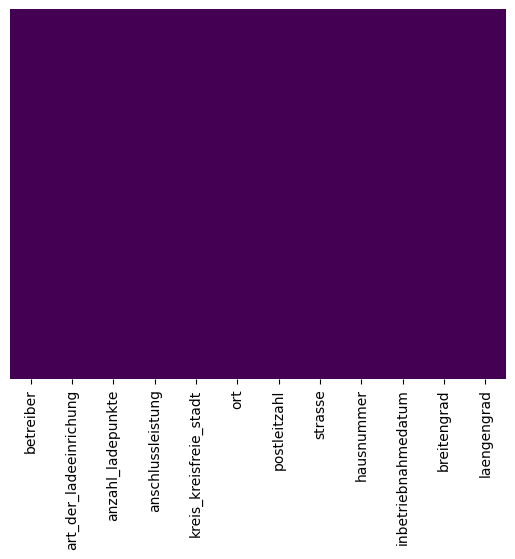

In [27]:
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Data Analyse

## Wachstum in Deutschland über die Jahre

Die Spalte ‘inbetriebnahmedatum‘ von ihrem ursprünglichen Datentyp in ein Pandas-Datetime-Objekt konvertiert. 

Hierfür gruppierten wir zunächst unseren Datensatz (ds) mithilfe der Funktion groupby(‘year‘)‘, die die Daten nach dem Jahr gruppiert und die Funktion ‘size()‘, die die Anzahl der Einträge in jeder Gruppe zurückgibt.

Mit ‘reset_index(name=‘count‘)‘ werden die gruppierten Daten in einen DataFrame umgewandelt unter der Verwendung von den Spalten ‘year‘ und ‘count‘. 

Mit ‘px.bar‘ wird dann ein Balkendiagramm erstellt. 

Die X-Achse zeigt die Jahre und die Y-Achse die Anzahl der E-Ladestationen an. 

Durch ‘fig.show()‘ wird das Balkendiagramm ausgegeben.  


In [28]:
# datetime
ds['inbetriebnahmedatum'] = pd.to_datetime(ds['inbetriebnahmedatum'])

In [29]:
ds['year'] = ds['inbetriebnahmedatum'].dt.year
ds['month'] = ds['inbetriebnahmedatum'].dt.month

In [30]:
# Wie viele E- Ladesationen wurden im Jahr gebaut?
year_group =pd.DataFrame(ds.groupby('year').size().reset_index(name='count'))

In [31]:
fig = px.bar(year_group,
            x='year',
            y='count',
            title='Wachstum an E-Ladestationen über die Jahre in Deutschland',
            color='count',
            labels = {'count':'Anzahl'},
            height = 700)
fig.update_layout(xaxis_title='Jahre', yaxis_title='Anzahl der Ladesäulen')
fig.show()

## Schwankungen über die Jahreszeiten

In [61]:
# Konvertieren der Spalte 'inbetriebnahmedatum' in das Datetime-Format
ds['inbetriebnahmedatum'] = pd.to_datetime(ds['inbetriebnahmedatum'], errors='coerce')

# Erstellen einer neuen Spalte mit dem Jahr
ds['jahr'] = ds['inbetriebnahmedatum'].dt.year

# Erstellen einer neuen Spalte mit dem Monat
ds['monat'] = ds['inbetriebnahmedatum'].dt.month

# Erstellen einer neuen Spalte mit der Kalenderwoche
ds['kalenderwoche'] = ds['inbetriebnahmedatum'].dt.isocalendar().week

In [62]:
# Filtere der Spalte jahr
ds = ds[ds['jahr'] <= 2022]
ds = ds[ds['jahr'] >= 2010]

# Sortiere den DataFrame nach 'inbetriebnahmedatum'
ds = ds.sort_values(by='inbetriebnahmedatum')

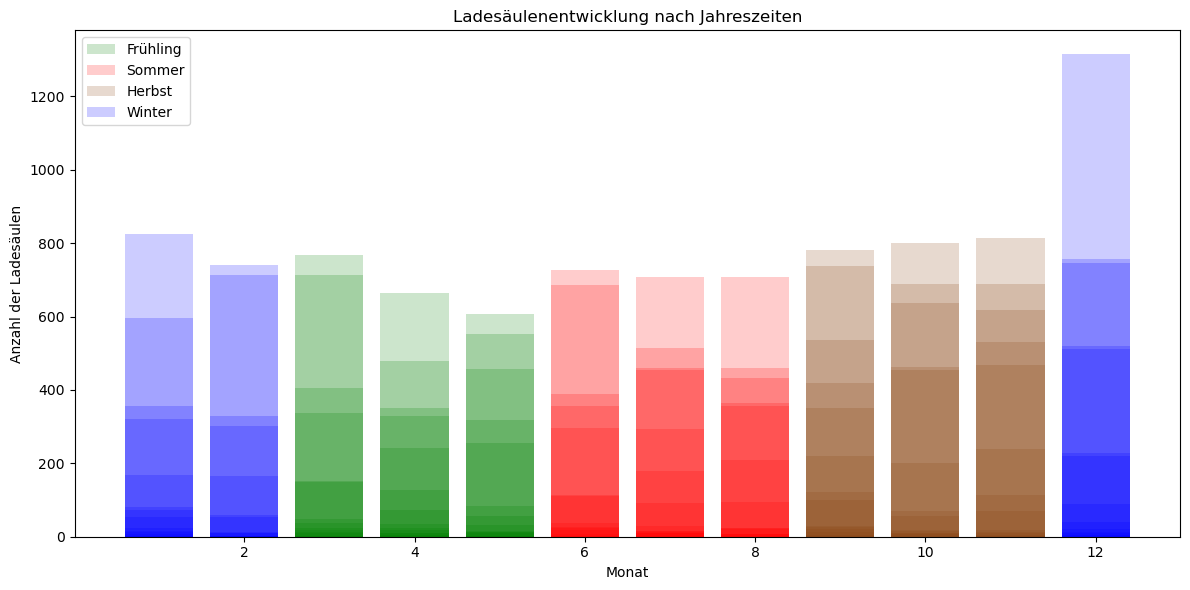

In [72]:
# Alle relevanten Daten in data laden
data = {
    'inbetriebnahmedatum': ds['inbetriebnahmedatum'],
    'monat': ds['monat'],
    'jahr': ds['jahr']
}

# jeweiligen Jahreszeiten eine Farbe zuordnen, grau als Default Wert
def get_color(jahreszeit):
    color_mapping = {'Frühling': 'green', 'Sommer': 'red', 'Herbst': 'saddlebrown', 'Winter': 'blue'}

    return color_mapping.get(jahreszeit, 'gray')

# Funktion um Jahreszeit zu bestimmen
# Definieren der Jahreszeiten
def jahreszeit_bestimmen(datum):
    fruehling_beginn = dt.strptime("01-03", "%d-%m").replace(year=datum.year)
    fruehling_ende = dt.strptime("31-05", "%d-%m").replace(year=datum.year)

    sommer_beginn = dt.strptime("01-06", "%d-%m").replace(year=datum.year)
    sommer_ende = dt.strptime("31-08", "%d-%m").replace(year=datum.year)

    herbst_beginn = dt.strptime("01-09", "%d-%m").replace(year=datum.year)
    herbst_ende = dt.strptime("30-11", "%d-%m").replace(year=datum.year)

    winter_beginn = dt.strptime("01-12", "%d-%m").replace(year=datum.year)
    winter_ende = dt.strptime("28-02", "%d-%m").replace(year=datum.year)
# Zuordnen der Jahreszeiten
    if fruehling_beginn <= datum <= fruehling_ende:
        return "Frühling"
    elif sommer_beginn <= datum <= sommer_ende:
        return "Sommer"
    elif herbst_beginn <= datum <= herbst_ende:
        return "Herbst"
    else:
        return "Winter"


# Jahreszeit_bestimmen auf die Spalte "inbetriebnahmedatum"
ds['Jahreszeit'] = ds['inbetriebnahmedatum'].apply(jahreszeit_bestimmen)

# Datenexploration der Splate Jahreszeit
ds_expanded = ds.explode('Jahreszeit')

# Gruppieren nach Jahr, Monat und Jahreszeit und berechnen der Summe der Anzahl der Ladesäulen
grouped_data = ds_expanded.groupby(['jahr', 'monat', 'Jahreszeit']).size().reset_index(name='Anzahl')

# Sortieren der Jahreszeiten
sorted_seasons = ['Frühling', 'Sommer', 'Herbst', 'Winter']
grouped_data['Jahreszeit'] = pd.Categorical(grouped_data['Jahreszeit'], categories=sorted_seasons, ordered=True)
grouped_data = grouped_data.sort_values(by=['Jahreszeit'])

# Erstellen des Balkendiagrammes
plt.figure(figsize=(12, 6))

for jahreszeit in sorted_seasons:
 # Erstelle eine Teilmenge (subset) des DataFrames für die aktuelle Jahreszeit
    subset = grouped_data[grouped_data['Jahreszeit'] == jahreszeit]
 # Erstelle ein Balkendiagramm für die Anzahl der Ladesäulen nach Monat und aktueller Jahreszeit
    plt.bar(subset['monat'], subset['Anzahl'], color=get_color(jahreszeit), label=jahreszeit, alpha= 0.2)

#Beschriftung des Diagrammes
plt.xlabel('Monat')
plt.ylabel('Anzahl der Ladesäulen')
plt.title('Ladesäulenentwicklung nach Jahreszeiten')
plt.legend()
plt.tight_layout()
plt.show()

## Stadtkreise vs. Landkreise

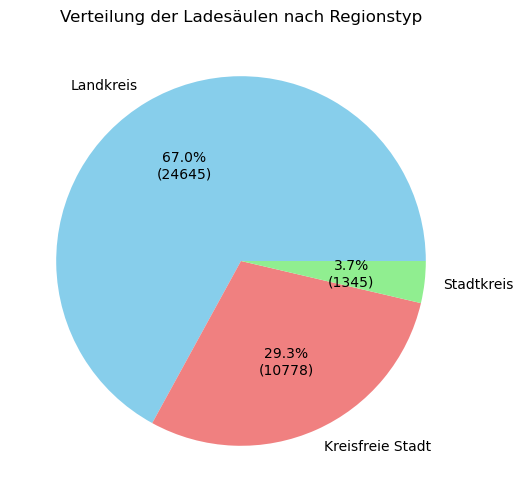

In [7]:
#Region extrahieren
def extract_region(x):
    return x.split()[0]

# Neue temporäre Spalte "Regionstyp" 
ds['Regionstyp'] = ds['kreis_kreisfreie_stadt'].apply(extract_region)

# Umschreiben bei der Ausgabe für bessere Übersicht
ds['Regionstyp'] = ds['Regionstyp'].replace('Kreisfreie', 'Kreisfreie Stadt')

# Verbinde die Zählungen von "Landkreis" und "Kreis" da beide Begriffe im Datensatz benutzt werden, obwohl sie das gleiche sind.
gesamt_count = ds['Regionstyp'].replace({'Kreis': 'Landkreis'}).value_counts()

# Größe vom Kreisdiagramm
plt.figure(figsize=(10,6))

# Farben für die Segmente
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Funktion, um absolute Anzahl in Klammern unterhalb der Prozentzahl anzuzeigen
def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return f'{pct:.1f}%\n({absolute})'

# Kreisdiagramm erstellen
gesamt_count.plot(kind='pie', autopct=lambda pct: func(pct, gesamt_count), colors=colors)

# Diagramm-Titel und Achsenbeschriftungen
plt.title('Verteilung der Ladesäulen nach Regionstyp')
plt.ylabel('')  # Entfernt die standardmäßige Beschriftung der y-Achse

# Diagramm anzeigen
plt.show()



# Heatmap Deutschland

In [25]:
# Mittelpunkt der Karte (Durchschnitt der Koordinaten)
map_center = [ds['breitengrad'].mean(), ds['laengengrad'].mean()]

# Erstelle eine Deutschlandkarte als Hintergrund
germany_map = folium.Map(location=map_center, zoom_start=6, tiles='http://a.tile.openstreetmap.de/tiles/osmde/{z}/{x}/{y}.png',
            attr='&copy; <a href="https://www.openstreetmap.de/karte.html">OpenStreetMap Deutschland</a> contributors')

# Extrahiere die Koordinaten aus dem Datensatz
coordinates = ds[['breitengrad', 'laengengrad']].values

# Füge die Heatmap hinzu
HeatMap(coordinates,radius=15, blur=10, gradient={0.4: 'blue', 0.8: 'yellow', 1: 'red'}, min_opacity=0.4).add_to(germany_map)


# Speichere die Karte in einer Datei (zum Beispiel "heatmap_on_germany_map.html")
germany_map.save("heatmap_on_germany_map.html")

# Anzeigen der Karte im Jupyter Notebook
germany_map


# Prognose

In [39]:
# Berechnet Kalenderwochennummer ab 2005
def print_year_category(year):
    return max(0, 52 * (year - 2005))

In [40]:
# Konvertiere die Spalte 'inbetriebnahmedatum' im Datetime-Format
ds['inbetriebnahmedatum'] = pd.to_datetime(ds['inbetriebnahmedatum'], errors='coerce')

# Erstelle eine neue Spalte mit dem Jahr
ds['jahr'] = ds['inbetriebnahmedatum'].dt.year

# Erstelle eine neue Spalte mit der Kalenderwoche
ds['kalenderwoche'] = ds['inbetriebnahmedatum'].dt.isocalendar().week

# Filtere Zeilen vor dem Jahr 2005
ds = ds[ds['jahr'] >= 2005]

# Erstelle eine neue Spalte, die die Kalenderwochen von unten aufsteigend durchnummeriert
ds['KalNum'] = ds['jahr'].apply(print_year_category) + ds['kalenderwoche']

# Sortiere das DataFrame nach 'inbetriebnahmedatum'
ds = ds.sort_values(by='inbetriebnahmedatum')
     

In [41]:
# Gruppiere den DataFrame nach der Spalte 'KalNum' und zähle die Anzahl der Einträge pro Gruppe
grouped_data = ds.groupby('KalNum').size().reset_index(name='Anzahl')

# Erstelle eine neue Tabelle mit den Spalten 'KalNum' und 'Anzahl'
neue_tabelle = pd.DataFrame({'Anzahl': grouped_data['Anzahl']})

# Zeige die neue Tabelle an
neue_tabelle.tail()
     

Anzahl
649     121
650     122
651      89
652      49
653      71

In [42]:
# Zuweisung 100% der Daten in Trainingsdaten
trainingds = neue_tabelle[:len(neue_tabelle)]
Trainingsdaten = trainingds.iloc[:, 0:1].values

In [43]:
#Skalieren der traingsdaten um Fokus zu minimieren von o bis 1
scaler = MinMaxScaler(feature_range=(0, 1))
Trainingsdatenskaliert = scaler.fit_transform(Trainingsdaten)

In [44]:
# x_training Array für die Eingabewerte, y_training Array für Zielwerte
x_training = []
y_training = []

# Größe des Zeitfensters, das für die Vorhersage verwendet wird
Zeitfenster = 450
# Definiert die Anzahl der Vorhersagewochen
prediction = 50

# Erstellt Eingabe- und Zielwerte für das neuronale Netz
for i in range(Zeitfenster, len(Trainingsdatenskaliert)):
  x_training.append(Trainingsdatenskaliert[i-Zeitfenster:i, 0])
  y_training.append(Trainingsdatenskaliert[i, 0])

#NumPay für numerische Berechnung
x_training = np.array(x_training)
y_training = np.array(y_training)

# 2D in 3D für Neuonales Netz
x_training = np.reshape(x_training, (x_training.shape[0], x_training.shape[1], 1))
     

In [45]:
# Definiere ein Sequential-Modell mit drei SimpleRNN-Layern, Dropout für Regularisierung und einem Dense-Layer für die Ausgabe
nn = Sequential()
nn.add(SimpleRNN(units=40, return_sequences=True, input_shape=(x_training.shape[1], 1)))
nn.add(Dropout(0.4))
nn.add(SimpleRNN(units=40, return_sequences=True))
nn.add(Dropout(0.4))
nn.add(SimpleRNN(units=40))
nn.add(Dropout(0.4))
nn.add(Dense(units=1))

# Kompilieren des RNN-Models
nn.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Training des RNN-Models
nn.fit(x_training, y_training, epochs=26, batch_size=32)
     

Epoch 1/26
7/7 [==============================] - 3s 161ms/step - loss: 0.7729 - accuracy: 0.0000e+00
Epoch 2/26
7/7 [==============================] - 1s 165ms/step - loss: 0.8079 - accuracy: 0.0000e+00
Epoch 3/26
7/7 [==============================] - 1s 156ms/step - loss: 0.6253 - accuracy: 0.0000e+00
Epoch 4/26
7/7 [==============================] - 2s 235ms/step - loss: 0.7290 - accuracy: 0.0049
Epoch 5/26
7/7 [==============================] - 2s 243ms/step - loss: 0.5187 - accuracy: 0.0049
Epoch 6/26
7/7 [==============================] - 2s 243ms/step - loss: 0.5053 - accuracy: 0.0049
Epoch 7/26
7/7 [==============================] - 2s 248ms/step - loss: 0.4726 - accuracy: 0.0000e+00
Epoch 8/26
7/7 [==============================] - 2s 246ms/step - loss: 0.4080 - accuracy: 0.0000e+00
Epoch 9/26
7/7 [==============================] - 2s 268ms/step - loss: 0.4360 - accuracy: 0.0000e+00
Epoch 10/26
7/7 [==============================] - 2s 305ms/step - loss: 0.3450 - accuracy: 0.

In [46]:
# Bestimme die letzte Kalenderwoche
letzte_kalenderwoche = neue_tabelle.index[-1]

# Erstelle eine Funktion zur Erstellung von zukünftigen Wochen
def generiere_zukuenftige_kalenderwochen(letzte_kalenderwoche, anzahl_wochen=150):
    zukuenftige_kw = [letzte_kalenderwoche + i +1 for i in range(anzahl_wochen)]
    return zukuenftige_kw

# Erstelle 150 Wochen
zukuenftige_kalenderwochen = generiere_zukuenftige_kalenderwochen(letzte_kalenderwoche, anzahl_wochen = 150)

# Funktion für Vorhersagen zukünftiger Wochen mit dem neuralen Netzwerk nn und historischen Daten daten
def vorhersage_fuer_zukunft(nn, daten, start_index, anzahl_wochen=150):
    predictions = []

    for i in range(anzahl_wochen):
        input_data = daten[-Zeitfenster:]
        input_data = np.reshape(input_data, (1, Zeitfenster, 1))

        next_week = nn.predict(input_data)
        predictions.append(next_week[0, 0])

        daten = np.append(daten, next_week)

    return predictions

# Vorhersagen für zukünftige Wochen treffen
zukuenftige_vorhersagen = vorhersage_fuer_zukunft(nn, Trainingsdatenskaliert, letzte_kalenderwoche)

# Rückskalierung der Daten
zukuenftige_vorhersagen = scaler.inverse_transform(np.array(zukuenftige_vorhersagen).reshape(-1, 1))

# Erstelle eine DataFrame für die zukünftigen Vorhersagen
zukuenftige_vorhersagen_df = pd.DataFrame(zukuenftige_vorhersagen, columns=['Vorhersage'], index=zukuenftige_kalenderwochen)
     

1/1 [==============================] - 0s 63ms/step


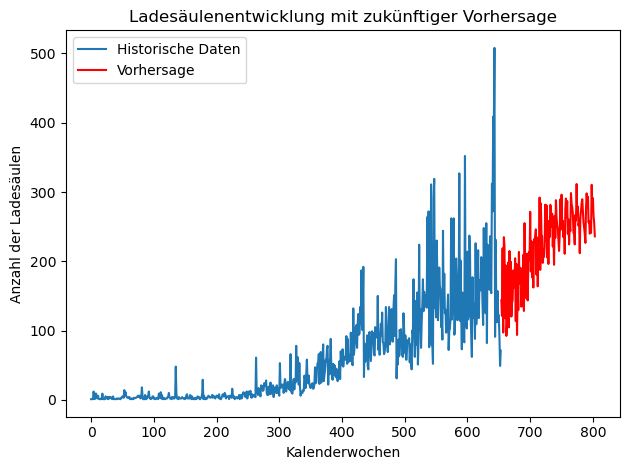

In [47]:
# Füge die zukünftigen Vorhersagen dem ursprünglichen DataFrame hinzu
neue_tabelle_zukunft = pd.concat([neue_tabelle, zukuenftige_vorhersagen_df])

# Visualisiere die historischen Daten und zukünftigen Vorhersagen
plt.plot(neue_tabelle_zukunft.index, neue_tabelle_zukunft['Anzahl'], label='Historische Daten')
plt.plot(zukuenftige_vorhersagen_df.index, zukuenftige_vorhersagen_df['Vorhersage'], label='Vorhersage', linestyle='solid', color='red')      #dashed funktioniert auch
plt.xlabel('Kalenderwochen')
plt.ylabel('Anzahl der Ladesäulen')
plt.title('Ladesäulenentwicklung mit zukünftiger Vorhersage')
plt.legend()
plt.tight_layout()
plt.show()
     

# Vergleich

## EnBW mobility+ AG und Co. KG vs. Konkurrenz

In [37]:
monthly_betreiber_data = ds.groupby(['year', 'month', 'betreiber']).size().sort_values(ascending=False) .reset_index(name='count')
monthly_betreiber_data['date'] = pd.to_datetime(dict(year = monthly_betreiber_data.year, month = monthly_betreiber_data.month, day=1))

In [38]:
betreiber_group = pd.DataFrame(ds['betreiber'].value_counts().reset_index().values, columns=['betreiber', 'count'])

In [39]:
konkurrenz_betreiber = betreiber_group['betreiber'].head(4).values

In [40]:
konkurrenz_betreiber

array(['E.ON Drive GmbH', 'EnBW mobility+ AG und Co.KG', 'EWE Go GmbH',
       'Mercedes-Benz AG'], dtype=object)

In [41]:
monthly_betreiber_data = monthly_betreiber_data[monthly_betreiber_data['betreiber'].isin(konkurrenz_betreiber)]
monthly_betreiber_data.sort_values(by='date', inplace = True) 

In [42]:
fig = px.line(monthly_betreiber_data, 
              x='date', 
              y="count", 
              title='Wachstum der Ladestationen je Betreiber (monatlich)', 
              color='betreiber',
              labels={'betreiber': 'Betreiber'},
              height= 700)
fig.update_layout(xaxis_title='Jahre', yaxis_title='Anzahl der Ladesäulen')
fig.show()

In [48]:
# Wie viel Ladestation hat ein Betreiber?
anzahl_betreiber = ds['betreiber'].value_counts().reset_index()
anzahl_betreiber.columns = ['betreiber', 'count']
ds['betreiber'].value_counts()

betreiber
E.ON Drive GmbH                              2154
EnBW mobility+ AG und Co.KG                  2006
EWE Go GmbH                                   894
Mercedes-Benz AG                              825
Westenergie Metering GmbH                     795
                                             ... 
Team Tankstelle Dörte Johannsen e.K.            1
Automobile Werner Handel und Service GmbH       1
Schmidt GmbH                                    1
Auto-Erz GmbH                                   1
eeg euco Energie GmbH                           1
Name: count, Length: 4770, dtype: int64

In [49]:
top_ten_betreiber = ds['betreiber'].value_counts().head(10).reset_index(name='count')
top_ten_betreiber.columns = ['betreiber', 'count']

In [50]:
top_ten_betreiber

betreiber  count
0              E.ON Drive GmbH   2154
1  EnBW mobility+ AG und Co.KG   2006
2                  EWE Go GmbH    894
3             Mercedes-Benz AG    825
4    Westenergie Metering GmbH    795
5       Stromnetz Hamburg GmbH    701
6         SWM Versorgungs GmbH    598
7                 Privatperson    569
8                     ALDI SÜD    557
9                  Allego GmbH    552

In [51]:
fig = px.bar(top_ten_betreiber,
            x = 'betreiber',
            y = 'count',
            title = 'Wie viele Ladesäulen haben die Top 10 Betreiber in Deutschland?',
            color = 'count',
            labels={'count': 'Anzahl'},
            height = 700)
fig.update_layout(xaxis_title='Betreiber', yaxis_title='Anzahl der Ladesäulen')
fig.show()

# E-Ladenetz in Baden-Württemberg

## Heatmap Baden-Württemberg

In [8]:
# Ungefähre Koordinaten vom Umriss der Grenzen von Baden-Württemberg
bw_polygon_coords = [
    [48.97, 8.22],
    [48.79, 8.04],
    [48.55, 7.80],
    [47.99, 7.59],
    [47.71, 7.51],
    [47.57, 7.62],
    [47.59, 7.89],
    [47.66, 8.91],
    [47.66, 8.91],
    [47.66, 9.90],
    [47.66, 10.11],
    [48.12, 10.12],
    [48.34, 10.01],
    [48.46, 10.06],
    [48.59, 10.30],
    [48.70, 10.27],
    [48.69, 10.50],
    [48.94, 10.43],
    [49.10, 10.21],
    [49.55, 10.07],
    [49.49, 9.94],
    [49.72, 9.79],
    [49.72, 9.78],
    [49.70, 9.63],
    [49.79, 9.65],
    [49.74, 9.31],
    [49.65, 9.41],
    [49.58, 9.11],
    [49.49, 8.95],
    [49.52, 8.75],
    [49.62, 8.69],
    [49.59, 8.42],
    [49.47, 8.46],
    [49.30, 8.48],
    [49.24, 8.39],
    [49.08, 8.35],
    [48.98, 8.25]
]

bw_polygon = Polygon(bw_polygon_coords)

# Funktion zur Überprüfung ob ein Standort innerhalb von Baden-Württemberg bzw. innerhalb der gegebenen Koordinaten liegt
def is_inside_bw(row):
    return bw_polygon.contains(Point(row['breitengrad'], row['laengengrad']))

# Anwendung Funktion auf jede Zeile des Datensatzes um zu schauen, ob der Standort innerhalb von Baden-Württemberg liegt
ds['Inside_BW'] = ds.apply(is_inside_bw, axis=1)

# Erstellung eines neuen Datensatzes, das nur die Standorte innerhalb von Baden-Württemberg enthält
ds_bw = ds[ds['Inside_BW']]

# Karte erstellen
karte_heatmap_bw = folium.Map(location=[48.6616, 9.3501], zoom_start=10)

# Heatmap erstellen 
heatmap_data_bw = [[row['breitengrad'], row['laengengrad']] for index, row in ds_bw.iterrows()]
HeatMap(heatmap_data_bw, radius=11).add_to(karte_heatmap_bw)

# HTML-Datei erstellen
karte_heatmap_bw_html = karte_heatmap_bw._repr_html_()

# Karte im Jupyter Notebook anzeigen
display(HTML(karte_heatmap_bw_html))

# Top 5 Land/Stadtkreise in Baden-Württemberg

In [48]:
# Datenrahmen aus der CSV-Datei laden
ladesaeulen_ds = pd.read_csv('C:\\Users\\Administrator\\OneDrive\\Dokumente\\Data Science Portfolio\\Data Science\\Analytics-Avengers\\charging_data.csv')

# Spaltenname für die Orte
orte_spalte = 'kreis_kreisfreie_stadt'

# Liste der gesuchten Orte bzw. alle Stadt/Landkreise in Baden-Württemberg
gesuchte_orte = ['Alb-Donau-Kreis', 'Biberach', 'Bodenseekreis', 'Böblingen', 'Breisgau-Hochschwarzwald',
                 'Calw', 'Emmendingen', 'Enzkreis', 'Esslingen', 'Freudenstadt', 'Göppingen',
                 'Heidenheim', 'Heilbronn', 'Hohenlohekreis', 'Karlsruhe', 'Konstanz', 'Lörrach',
                 'Ludwigsburg', 'Main-Tauber-Kreis', 'Mannheim', 'Neckar-Odenwald-Kreis', 'Ortenaukreis',
                 'Ostalbkreis', 'Pforzheim', 'Rastatt', 'Ravensburg', 'Rems-Murr-Kreis', 'Reutlingen',
                 'Rhein-Neckar-Kreis', 'Rottweil', 'Schwäbisch Hall', 'Schwarzwald-Baar-Kreis',
                 'Sigmaringen', 'Tübingen', 'Tuttlingen', 'Waldshut', 'Baden-Baden', 'Freiburg im Breisgau',
                 'Heidelberg', 'Heilbronn', 'Karlsruhe', 'Mannheim', 'Pforzheim', 'Stuttgart', 'Ulm']

# Datenrahmen nach den gesuchten Orten filtern
gefilterter_ds = ladesaeulen_ds[ladesaeulen_ds[orte_spalte].str.contains('|'.join(gesuchte_orte))]

# Anzahl der Ladesäulen pro Ort zählen
anzahl_ladesaeulen_pro_ort = gefilterter_ds.groupby(orte_spalte).size().reset_index(name='count')

# Top 5 Orte nach Ladesäulenanzahl auswählen
top5_orte = anzahl_ladesaeulen_pro_ort.sort_values(by='count', ascending=False).head(5)

# Ergebnisse anzeigen
print(top5_orte)

# Balkendiagramm mit Plotly Express erstellen
fig = px.bar(top5_orte,
             x='kreis_kreisfreie_stadt',
             y='count',
             title='Top 5 Stadt- und Landkreise in Baden-Württemberg',
             color='count',
             labels={'kreis_kreisfreie_stadt': 'Stadt- und Landkreise', 'count': 'Anzahl'},
             height=500)

fig.update_layout(xaxis_title='Stadt- und Landkreise', yaxis_title='Anzahl der Ladesäulen')
fig.show()


   kreis_kreisfreie_stadt  count
42   Stadtkreis Stuttgart    698
4     Landkreis Böblingen    530
8     Landkreis Esslingen    292
16  Landkreis Ludwigsburg    261
14    Landkreis Karlsruhe    223
